# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Датасет сохранили в переменную. Отлично

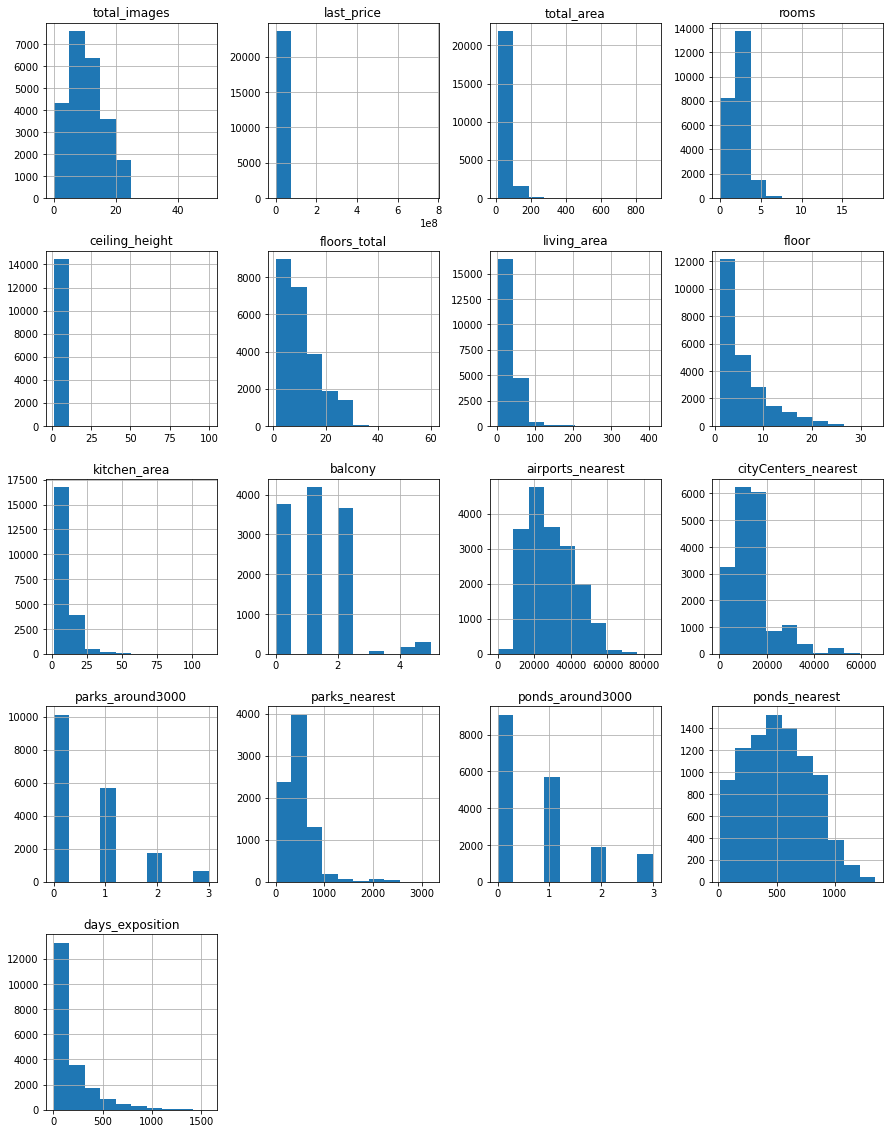

In [5]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Чтобы убрать текстовые предупреждения перед графиками используй plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})

### Описание данных:

**total_images** — число фотографий квартиры в объявлении

**last_price** — цена на момент снятия с публикации

**total_area** — площадь квартиры в квадратных метрах (м²)

**first_day_exposition** — дата публикации

**rooms** — число комнат

**ceiling_height** — высота потолков (м)

**floors_total** — всего этажей в доме

**living_area** — жилая площадь в квадратных метрах(м²)

**floor** — этаж

**is_apartment** — апартаменты (булев тип)

**studio** — квартира-студия (булев тип)

**open_plan** — свободная планировка (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**balcony** — число балконов

**locality_name** — название населённого пункта

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**city_centers_nearest** — расстояние до центра города (м)

**parks_around_3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around_3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Здесь для визуализации пропусков можно использовать такую библиотеку https://russianblogs.com/article/5001266235/

#### Пропуски наблюдаются в столбцах:

**ceiling_height** - высота потолков. Механический сбой выгрузки данных или человеческий фактор при заполнении объявлений. Предположу что можно заполнить средним или медианным значеним (ведь бывают очень и очень высокие потолки, но с учётом колличества данных вряд ли они могут сильно повлиять) значеним.

**floors_total** - колличество комнат. Возможно, механический сбой или человеческий фактор. Не знаю как поступать с этими пропусками, могу предположить что здесь необходимо смотреть на похожие варианты, хотя всего 86 пропусков.

**living_area** - жилая площадь в квадратных метрах(м²). Возможно, механический сбой или человеческий фактор. Не знаю как поступать с этими пропусками, могу предположить что здесь необходимо смотреть на похожие варианты и заполнять медианными значениями.

**is_apartment** - аппартаменты. Так как это булев тип, то там где NaN (нет данных) там должен стоять "0", т.е. это не апартаменты. 

**kitchen_area** - площадь кухни в квадратных метрах (м²). Возможно, механический сбой или человеческий фактор. Не знаю как поступать с этими пропусками, могу предположить что здесь необходимо смотреть на похожие варианты и заполнять медианными значениями.

**balcony** - балконы. Предположим: если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

**locality_name** - название населённого пункта. Скорее всего человеческий фактор. Всего 49 пропусков, можно эти объявления смело убирать из нашей таблицы, они не сильно повлияют на валидность результатов.

**airports_nearest** - расстояние до ближайшего аэропорта в метрах (м). Не знаю как поступать с этими пропусками, могу предположить что здесь необходимо смотреть на похожие варианты и заполнять медианными значениями.

**city_centers_nearest** - расстояние до центра города (м). Возможно, механический сбой или человеческий фактор. Предпологаю что эти данные можно заполнить медианными значениями в зависимости от населённого пункта.

**parks_around_3000** - число парков в радиусе 3 км. Возможно, механический сбой или человеческий фактор. Предпологаю что эти данные трогать не надо. Предпологаю что эти данные можно заполнить медианными значениями в зависимости от населённого пункта.

**parks_nearest** - расстояние до ближайшего парка. Возможно, механический сбой или человеческий фактор. Предпологаю что эти данные трогать не надо. Предпологаю что эти данные можно заполнить медианными значениями в зависимости от населённого пункта.

**ponds_around_3000** - число водоёмов в радиусе 3 км. Возможно, механический сбой или человеческий фактор. Предпологаю что эти данные трогать не надо. Предпологаю что эти данные можно заполнить медианными значениями в зависимости от населённого пункта.

**ponds_nearest** - расстояние до ближайшего водоёма. Возможно, механический сбой или человеческий фактор. Предпологаю что эти данные трогать не надо. Предпологаю что эти данные можно заполнить медианными значениями в зависимости от населённого пункта.

**days_exposition** - сколько дней было размещено объявление (от публикации до снятия). Возможно, механический сбой или человеческий фактор. Предпологаю что эти данные можно заполнить медианными значениями.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Очень хорошее знакомство с данными. Мы посмотрели на датасет и составили небольшой план дальнейших действий 

#### Предобработка данных

Для начала заполним

**ceiling_height** - среднем значеним выстоты потолков

**balcony** - все пропуски заменим на 0

**is_apartment** - все пропуски заменим на 0

**locality_name** - удалим строки с пропусками из-за незначительного колличества пропусков

**living_area** - удалим строки с пропусками из-за незначительного колличества пропусков

**floors_total** - удалим строки с пропусками из-за незначительного колличества пропусков

**living_area** - заполним медианным значением по населённому пункту

**kitchen_area** - заполним медианным значением по населённому пункту

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)
data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['living_area'])
data = data.dropna(subset=['floors_total'])

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Вот я со всем согласен, кроме замены по потолкам. В этом столбце много выбивающихся значений, и тут лучше менять на медиану. А если хочешь на среднее, то сперва надо выбросы проработать.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

Вот это другое дело.

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              795
balcony                     0
locality_name               0
airports_nearest         4906
city_centers_nearest     4885
parks_around_3000        4884
parks_nearest           14233
ponds_around_3000        4884
ponds_nearest           13341
days_exposition          2976
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21700 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21700 non-null  int64  
 1   last_price            21700 non-null  float64
 2   total_area            21700 non-null  float64
 3   first_day_exposition  21700 non-null  object 
 4   rooms                 21700 non-null  int64  
 5   ceiling_height        21700 non-null  float64
 6   floors_total          21700 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 21700 non-null  int64  
 9   is_apartment          21700 non-null  object 
 10  studio                21700 non-null  bool   
 11  open_plan             21700 non-null  bool   
 12  kitchen_area          20905 non-null  float64
 13  balcony               21700 non-null  float64
 14  locality_name         21700 non-null  object 
 15  airports_nearest   

В следующих столбцах необходимо заменить типы данных:

is_apartment - аппартаменты. Т.к. это в этом слобце булевы значения (т.е. true или false), то тип object ему не подходит.

first_day_exposition - дата публикации. Это явный столбец с временем и датой,  так что тоже меняем с object на datetime.

In [12]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [13]:
data['floor'] = data['floor'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Ты верно приводишь жанные к нужному типу

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21700 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21700 non-null  int64  
 1   last_price            21700 non-null  float64
 2   total_area            21700 non-null  float64
 3   first_day_exposition  21700 non-null  object 
 4   rooms                 21700 non-null  int64  
 5   ceiling_height        21700 non-null  float64
 6   floors_total          21700 non-null  int64  
 7   living_area           21700 non-null  float64
 8   floor                 21700 non-null  int64  
 9   is_apartment          21700 non-null  bool   
 10  studio                21700 non-null  bool   
 11  open_plan             21700 non-null  bool   
 12  kitchen_area          20905 non-null  float64
 13  balcony               21700 non-null  float64
 14  locality_name         21700 non-null  object 
 15  airports_nearest   

In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

В названиях населённых пунктов есть неявные дубликаты из-за буквы ё, необходимо заменить во всех словах её на е

А так же заменим городской поселок на поселок городского типа

Коттеджный поселок заменик на поселок

садоводческое некоммерческое товарищество на садовое товарищество

при железнодорожной станции на станции

In [16]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции','станции')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Неявные дубли проработаны.

Проверим успешность замены

In [17]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Лесогорский', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Советский', 'городской поселок Федоровское',
       'городской поселок Янино-1', 'деревня Агалатово', 'дерев

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21700 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21700 non-null  int64  
 1   last_price            21700 non-null  float64
 2   total_area            21700 non-null  float64
 3   first_day_exposition  21700 non-null  object 
 4   rooms                 21700 non-null  int64  
 5   ceiling_height        21700 non-null  float64
 6   floors_total          21700 non-null  int64  
 7   living_area           21700 non-null  float64
 8   floor                 21700 non-null  int64  
 9   is_apartment          21700 non-null  bool   
 10  studio                21700 non-null  bool   
 11  open_plan             21700 non-null  bool   
 12  kitchen_area          20905 non-null  float64
 13  balcony               21700 non-null  float64
 14  locality_name         21700 non-null  object 
 15  airports_nearest   

В процессе понял что данные для попусков которые беруться на основе локации, лучше применить после подобной фильтрации, ведь это может сильно повлиять на результат

In [19]:
for ap in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == ap) & (data['living_area'].isna()), 'living_area'] = \
        data.loc[(data['locality_name'] == ap), 'living_area'].median()
    except:
        data.dropna(subset=['living_area'])

In [20]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['locality_name'] == ap), 'kitchen_area'].median()
data = data.dropna(subset=['kitchen_area'])        

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Чтобы убрать текстовые предупреждения используй import warnings
warnings.filterwarnings("ignore")

In [21]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == ap), 'airports_nearest'].median()
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [22]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == ap), 'city_centers_nearest'].median()
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

In [23]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['parks_around_3000'].isna()), 'parks_around_3000'] = \
    data.loc[(data['locality_name'] == ap), 'parks_around_3000'].median()
data['parks_around_3000'] = data['parks_around_3000'].fillna(data['parks_around_3000'].median())

In [24]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == ap), 'parks_nearest'].median()
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [25]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['ponds_around_3000'].isna()), 'ponds_around_3000'] = \
    data.loc[(data['locality_name'] == ap), 'ponds_around_3000'].median()
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(data['ponds_around_3000'].median())

In [26]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == ap), 'ponds_nearest'].median()
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [27]:
for ap in data['locality_name'].unique():
    data.loc[(data['locality_name'] == ap) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['locality_name'] == ap), 'days_exposition'].median()
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

In [28]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21697 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21697 non-null  int64  
 1   last_price            21697 non-null  float64
 2   total_area            21697 non-null  float64
 3   first_day_exposition  21697 non-null  object 
 4   rooms                 21697 non-null  int64  
 5   ceiling_height        21697 non-null  float64
 6   floors_total          21697 non-null  int64  
 7   living_area           21697 non-null  float64
 8   floor                 21697 non-null  int64  
 9   is_apartment          21697 non-null  bool   
 10  studio                21697 non-null  bool   
 11  open_plan             21697 non-null  bool   
 12  kitchen_area          21697 non-null  float64
 13  balcony               21697 non-null  float64
 14  locality_name         21697 non-null  object 
 15  airports_nearest   

Так намного лучше и чище

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Ты к этому моменту удалил слишком много данных. Если удаляешь, то не более 10% от изначальных данных. У тебя удалено порядка 30%.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

А теперь мы можем продолжать анализ дальше.

На графике снизу видно, что есть одно выбивающиеся значение в 100. Его надо убрать, что бы лучше рассмотреть график, хотя даже так понятно что есть значения от 20 до 40 метров, а так же близкие к 0.

<AxesSubplot:>

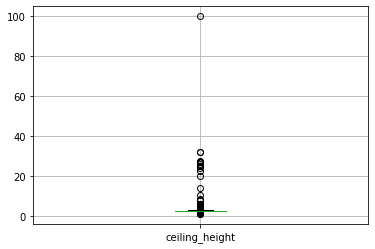

In [30]:
data.boxplot(column='ceiling_height')

<AxesSubplot:>

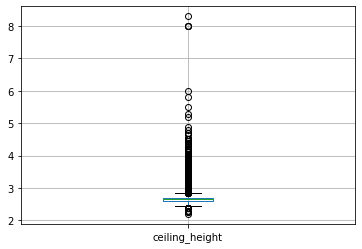

In [31]:
data = data.loc[data['ceiling_height'] < 50]
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height']*0.1
data.loc[data['ceiling_height'] < 2.2] = data['ceiling_height'].median()
data.boxplot(column='ceiling_height')

<AxesSubplot:>

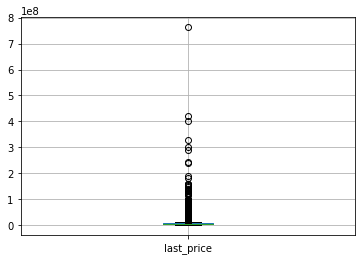

In [32]:
data.boxplot(column='last_price')

В этой колонке мы видем колосально "улетевшие" значения.

<AxesSubplot:>

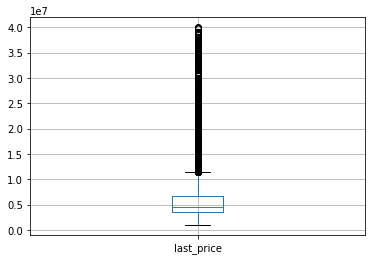

In [33]:
data.loc[(data['last_price'] >= 40000000) | (data['last_price'] < 1000000), 'last_price'] = data['last_price'].median()
data.boxplot(column='last_price')

Оставил дороже 1 000 000 и не выше 100 000 000, я предположил, что значение не укладывающиеся в эти рамки необходимо привести к медианной.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.0,8.0,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,99.0
1,7.0,3350000.0,40.40,2018-12-04T00:00:00,1.0,2.65,11.0,18.6,1.0,False,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,459.5,0.0,587.0,81.0
2,10.0,5196000.0,56.00,2015-08-20T00:00:00,2.0,2.65,5.0,34.3,4.0,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2.0,10000000.0,100.00,2018-06-19T00:00:00,2.0,3.03,14.0,32.0,13.0,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10.0,2890000.0,30.40,2018-09-10T00:00:00,1.0,2.65,12.0,14.4,5.0,False,...,9.10,0.0,городской поселок Янино-1,26662.0,13094.0,0.0,459.5,0.0,505.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9.0,4600000.0,62.40,2016-08-05T00:00:00,3.0,2.60,9.0,40.0,8.0,False,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9.0,9700000.0,133.81,2017-03-21T00:00:00,3.0,3.70,5.0,73.3,3.0,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,99.0
23695,14.0,3100000.0,59.00,2018-01-15T00:00:00,3.0,2.65,5.0,38.0,4.0,False,...,8.50,0.0,Тосно,26662.0,13094.0,0.0,459.5,0.0,505.0,45.0
23696,18.0,2500000.0,56.70,2018-02-11T00:00:00,2.0,2.65,3.0,29.7,1.0,False,...,8.15,0.0,село Рождествено,26662.0,13094.0,0.0,459.5,0.0,505.0,99.0


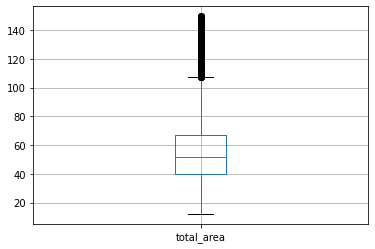

In [34]:
data.loc[(data['total_area'] >= 150) | (data['total_area'] <= 10), 'total_area'] = data['total_area'].median()
data.boxplot(column='total_area')
data

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Тут можно так сделать. Согласен. 

<AxesSubplot:>

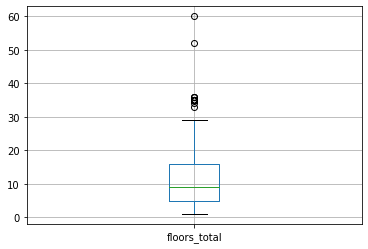

In [35]:
data.boxplot(column='floors_total')

<AxesSubplot:>

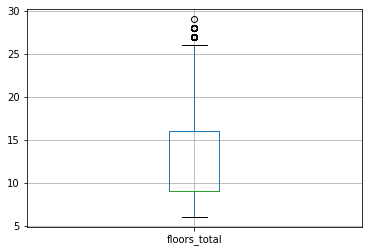

In [36]:
data.loc[(data['floors_total'] >= 30) | (data['floors_total'] <= 5), 'floors_total'] = data['floors_total'].median()
data['floors_total'] = data['floors_total'].astype('int')
data.boxplot(column='floors_total')

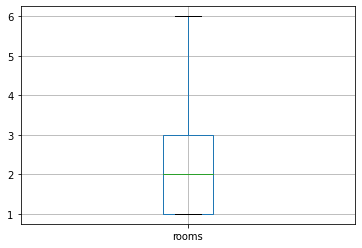

In [37]:
data = data.replace(0,1)
data.loc[data['rooms'] >= 7, 'rooms'] = data['rooms'].median()
data.boxplot(column='rooms')
data['rooms'].median()
data['rooms'] = data['rooms'].astype('int')

<AxesSubplot:>

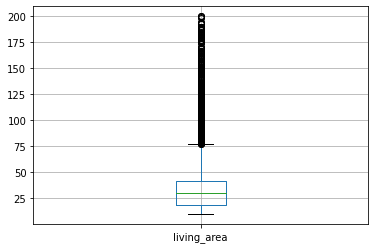

In [38]:
data.loc[(data['living_area'] < 10) | (data['living_area'] > 200), 'living_area'] = data['living_area'].median()
data.boxplot(column='living_area')

<AxesSubplot:>

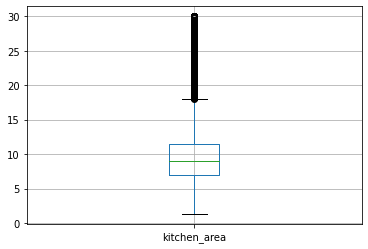

In [39]:
data = data.loc[data['kitchen_area'] <= 80]
data.loc[(data['kitchen_area'] > 30) & (data['kitchen_area'] < 80), 'kitchen_area'] = data.loc[(data['kitchen_area'] > 30) & (data['kitchen_area'] < 80), 'kitchen_area']*0.1
data.boxplot(column='kitchen_area')

**<font color="maroon">К данному моменту мы избавились от всех слишком сильных "всплесков" и можно приступать к подсчётам</font>**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Тут надо бы добавить промежуточный вывод.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

Хоть можно было и обширнее описать, ну ок. 

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра:

In [40]:
data['price_one_meter'] = data['last_price']/data['total_area']

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [41]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [42]:
data['day_of_week'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())

Месяц публикации объявления;

In [43]:
#data['month'] = data['first_day_exposition'].apply(lambda x: x.month_name())
data['month'] = data['first_day_exposition'].dt.month

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Здесь можнл было повспользоваться методом df.month 

Год публикации объявления;

In [44]:
data['year'] = data['first_day_exposition'].dt.year

Только сейчас заметил, что есть очень сильно выбивающиеся значения даты -_-

In [45]:
data = data.loc[data['year'] > 2015]

Тип этажа квартиры (значения — «первый», «последний», «другой»);

In [46]:
def number_of_storeys(row):
    number_of_storeys = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == number_of_storeys:
        return 'последний'
    elif 1 < floor < number_of_storeys:
        return 'другой'

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Простая удобная и понятная функция. 

In [47]:
data['number_of_storeys'] = data.apply(number_of_storeys, axis=1)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [48]:
data['city_centers_km'] = ((data['city_centers_nearest'].astype('int'))/1000).astype('int')

### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:
 
общая площадь;

жилая площадь;

площадь кухни;

цена объекта;

количество комнат;

высота потолков;

этаж квартиры;

тип этажа квартиры («первый», «последний», «другой»);

общее количество этажей в доме;

расстояние до центра города в метрах;

расстояние до ближайшего аэропорта;

расстояние до ближайшего парка;

день и месяц публикации объявления.

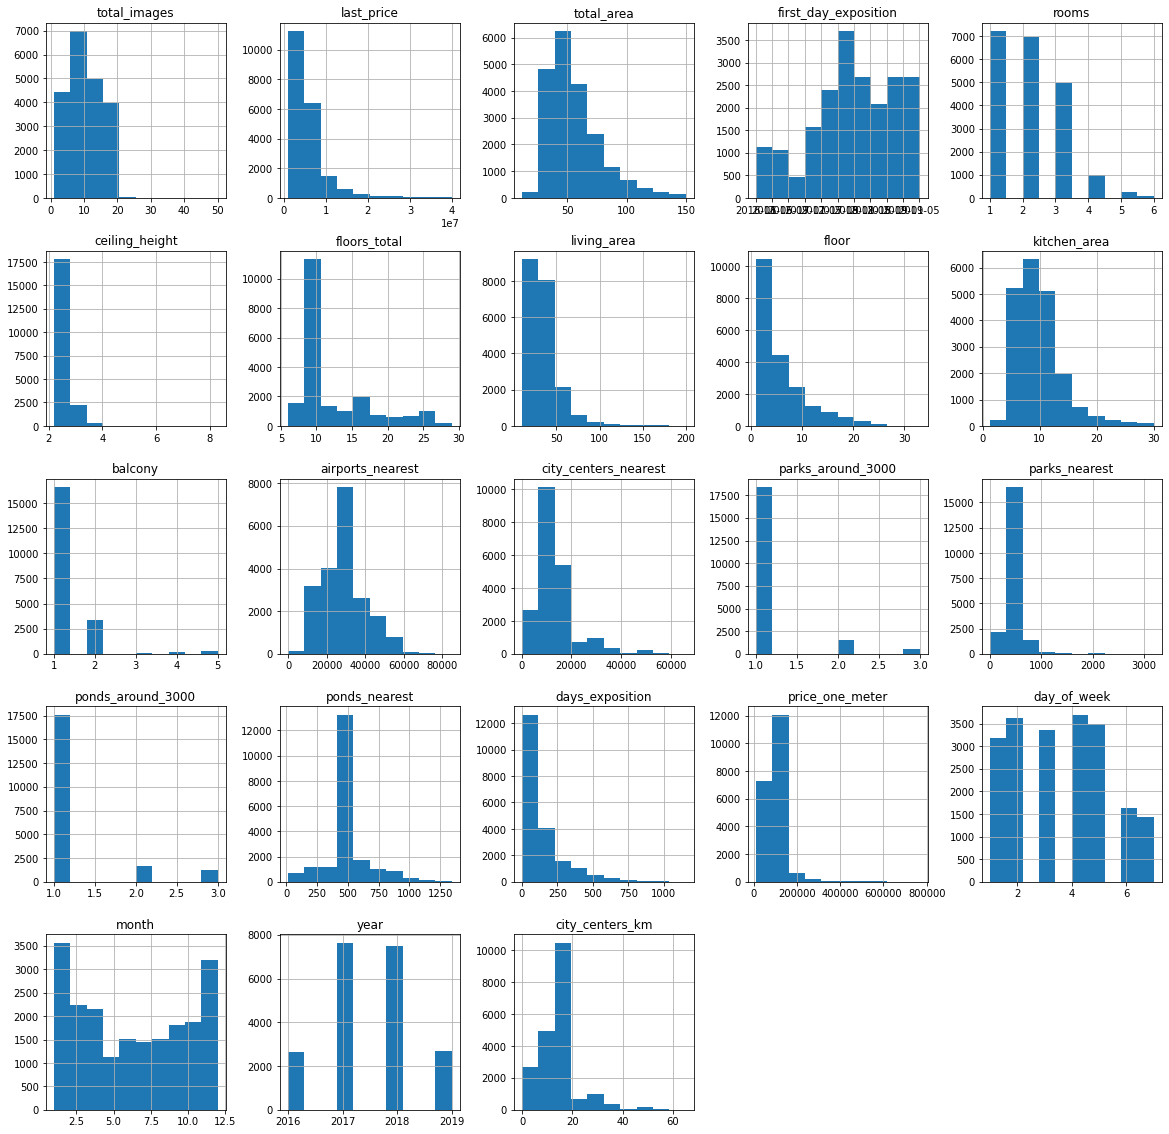

In [49]:
data.hist(figsize=(20, 20))
plt.show()

Общая площадь показывает нормальное распределение на графике, с учётом того, что большинство квартир строились во времена СССР по жёстким стандартам, можно объяснить необычайно высокое значение пика на графике.

Жилая площадь так же как и общая площадь показывает очень высокие пиковые значение, по тем же причинам, что описанны для общей площади.

Площадь кухни так же как и общая площадь показывает очень высокие пиковые значение, по тем же причинам, что описанны для общей площади.

цена объекта данные выглядят правдоподобно.

количество комнат, больше всего "однушек" и "двушек" ожидаемо.

высота потолков так же как и общая площадь показывает очень высокие пиковые значение, по тем же причинам, что описанны для общей площади.

этаж квартиры так же как и общая площадь показывает очень высокие пиковые значение, по тем же причинам, что описанны для общей площади.

тип этажа квартиры («первый», «последний», «другой»), тут без сюрпризов больше всего квартир продают не на первом и не на последнем этаже, так как большинство квартир не находятся на первом или последнем.

общее количество этажей в доме; так же как и общая площадь показывает очень высокие пиковые значение, по тем же причинам, что описанны для общей площади.

расстояние до центра города в метрах, вполне нормальное распределение

расстояние до ближайшего аэропорта, вполне нормальное распределение

расстояние до ближайшего парка, вполне нормальное распределение

день и месяц публикации объявления, есть аномальные провалы.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Хороший ты метод использовал для вывода сразу нескольких графиков.

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

- Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

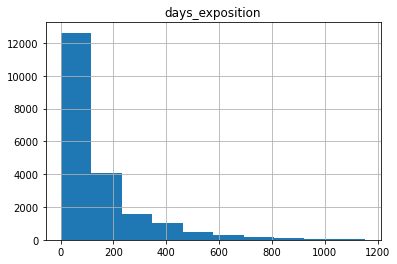

In [50]:
data.hist('days_exposition')

In [51]:
data['days_exposition'].mean()

146.45499902171787

In [52]:
data['days_exposition'].median()

99.0

In [53]:
data.loc[data['days_exposition'] < 200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,day_of_week,month,year,number_of_storeys,city_centers_km
0,20.0,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8.0,1,...,482.0,2.0,755.0,99.0,120370.370370,4,3,2019,другой,16
1,7.0,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1.0,1,...,459.5,1.0,587.0,81.0,82920.792079,2,12,2018,первый,18
4,2.0,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13.0,1,...,112.0,1.0,48.0,121.0,100000.000000,2,6,2018,другой,8
5,10.0,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5.0,1,...,459.5,1.0,505.0,55.0,95065.789474,1,9,2018,другой,13
6,6.0,3700000.0,37.30,2017-11-02,1,2.65,26,10.6,6.0,1,...,733.0,1.0,593.0,155.0,99195.710456,4,11,2017,другой,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3.0,5500000.0,52.00,2018-07-19,2,2.65,9,31.0,2.0,1,...,300.0,1.0,505.0,15.0,105769.230769,4,7,2018,другой,6
23694,9.0,9700000.0,133.81,2017-03-21,3,3.70,9,73.3,3.0,1,...,796.0,3.0,381.0,99.0,72490.845228,2,3,2017,другой,4
23695,14.0,3100000.0,59.00,2018-01-15,3,2.65,9,38.0,4.0,1,...,459.5,1.0,505.0,45.0,52542.372881,1,1,2018,другой,13
23696,18.0,2500000.0,56.70,2018-02-11,2,2.65,9,29.7,1.0,1,...,459.5,1.0,505.0,99.0,44091.710758,7,2,2018,первый,13


**<font color="maroon">Видно что дольше всего продаются те квартиры, в которых было много пропусков.</font>**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Здесь надо было рассмотреть график немного подробнее. На нем есть выбросы и стоит их найти и пояснить причину возникновения. 

В среднем продажа занимает около 143 дней, но на это значение очень сильно влияют объявления что "висят" уже больше года. Разумно предположить, что если выстовлять по рыночным условиям, то продажа не займёт дольше 100 дней.

**"Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."**

        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

0.6133204948388111

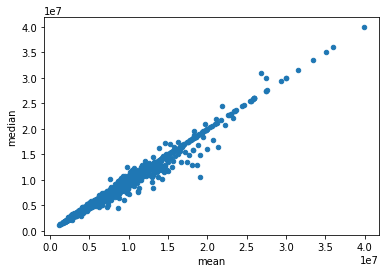

In [54]:
area_price = pd.pivot_table(data,
                            index = 'total_area',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
area_price.columns = ['mean', 'median']
area_price.plot.scatter(x = 'mean' , y = 'median')
data['total_area'].corr(data['last_price'])

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Лучше всего тут подойдет график вида scatter

0.63 средняя положительная корреляция, показывающая, что от в среднем чем выше площадь тем выше и цена, что кажется вполне логичным, но вид графика меня смущает

0.6355479606105301

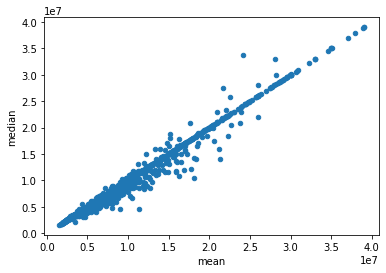

In [55]:
living_price = pd.pivot_table(data,
                            index = 'living_area',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
living_price.columns = ['mean', 'median']
living_price.plot.scatter(x= 'mean' ,y = 'median')
data['living_area'].corr(data['last_price'])

0.64 средняя положительная корреляция, показывающая, что от в среднем чем выше жилая плошать тем выше и цена, что кажется вполне логичным.

0.44614300900987913

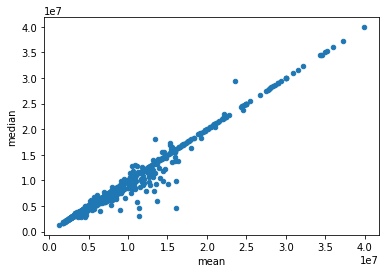

In [56]:
kitchen_price = pd.pivot_table(data,
                            index = 'kitchen_area',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
kitchen_price.columns = ['mean', 'median']
kitchen_price.plot.scatter(x= 'mean', y = 'median')
data['kitchen_area'].corr(data['last_price'])

0.39 намного слабее

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Да, зависимость тут слабая. Как я и говорил, лучше всего подойдет график вида scatter

0.47956937330666377

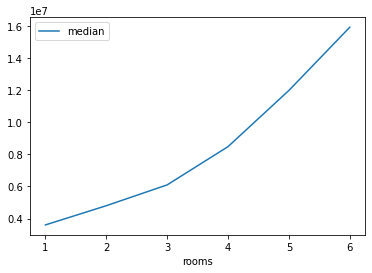

In [57]:
rooms_price = pd.pivot_table(data,
                            index = 'rooms',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
rooms_price.columns = ['mean', 'median']
rooms_price.plot(y = 'median')

data['rooms'].corr(data['last_price'])

0.5 средний уровень положительной кореляции

<AxesSubplot:xlabel='number_of_storeys'>

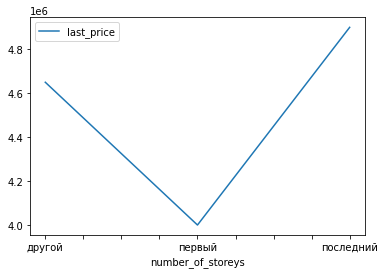

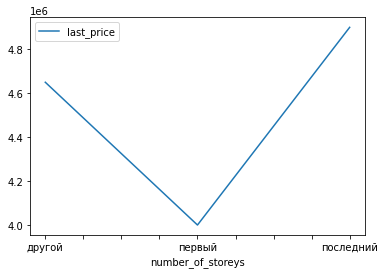

In [58]:
number_price = pd.pivot_table(data,
                            index = 'number_of_storeys',
                            values = 'last_price',
                            aggfunc=['count', 'median']
                           )
number_price.plot(y = 'median')
number_price.plot(y = 'median')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Квартиры на первом этаже пользуются наименьшим спросом.

На первом этаже самые дешёвые квартиры

<AxesSubplot:xlabel='day_of_week'>

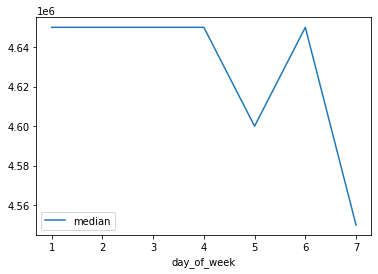

In [59]:
day_price = pd.pivot_table(data,
                            index = 'day_of_week',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
day_price.columns = ['mean', 'median']
day_price.plot(y = 'median')

Размещения в пятницу самые дешёвые

<AxesSubplot:xlabel='month'>

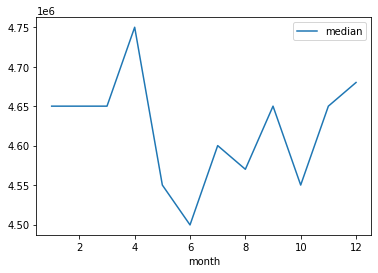

In [60]:
month_price = pd.pivot_table(data,
                            index = 'month',
                            values = 'last_price',
                            aggfunc=['count', 'median']
                           )
month_price.columns = ['count', 'median']
month_price.plot(y = 'median')

<AxesSubplot:xlabel='year'>

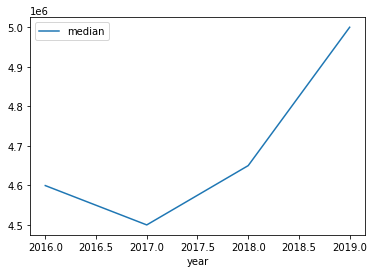

In [61]:
year_price = pd.pivot_table(data,
                            index = 'year',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
year_price.columns = ['mean', 'median']
year_price.plot(y = 'median')

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Для таких параметров, как день, месяц и год публикации считать коэффицент корреляции нет смысла. Для этих параметров нет линейной связи и зависимость надо искать только по графику. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

Засчитано

Из графиков видно что июнь и октябрь самые "дешёвые" месяца.

**"Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."**

In [62]:
local_price = pd.pivot_table(data,
                            index = 'locality_name',
                            values = 'price_one_meter',
                            aggfunc=['count', 'median']
                           )
local_price.columns = ['count', 'median']
local_price = local_price.sort_values('count', ascending = False).head(10)
local_price

,count,median
locality_name,,
Санкт-Петербург,13631,104580.152672
поселок Мурино,477,86687.306502
поселок Шушары,393,77380.952381
Всеволожск,345,65789.473684
Пушкин,323,100000.000000
Колпино,313,74722.222222
поселок Парголово,289,91516.560139
Гатчина,279,67796.610169
деревня Кудрово,241,92745.259687


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рейтинг топ-10 получен

In [63]:
local_price[local_price['median'] == local_price['median'].max()]

,count,median
locality_name,,
Санкт-Петербург,13631,104580.152672


In [64]:
local_price[local_price['median'] == local_price['median'].min()]

,count,median
locality_name,,
Всеволожск,345,65789.473684


Самые дорогие обхявления в Санкт-Петербурге, а самые дешёвые в Красном Селе.

**"Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."**

<AxesSubplot:xlabel='city_centers_km'>

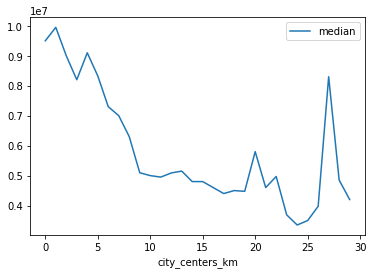

In [65]:
range_price = pd.pivot_table(data.loc[data['locality_name'] == 'Санкт-Петербург'],
                            index = 'city_centers_km',
                            values = 'last_price',
                            aggfunc=['mean', 'median']
                           )
range_price.columns = ['mean', 'median']
range_price.plot(y = 'median')

In [66]:
range_price

,mean,median
city_centers_km,,
0,1.161597e+07,9500000.0
1,1.164506e+07,9950000.0
2,1.056988e+07,9000000.0
3,9.847595e+06,8200000.0
4,1.112908e+07,9100000.0
5,1.052574e+07,8326824.0
6,1.015309e+07,7300000.0
7,9.345778e+06,7000000.0
8,8.183954e+06,6300000.0


<AxesSubplot:xlabel='city_centers_km', ylabel='last_price'>

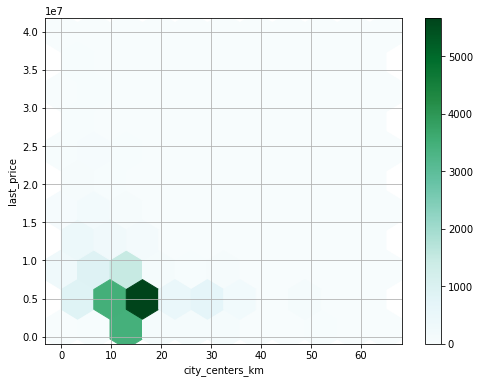

In [67]:
data.plot(x='city_centers_km', y='last_price', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True) 

Если смотреть на ценообразование, то можно предположить что после 5 км, цены резко уходят вниз, а предложения вверх.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Тут отлично вышло. Как сам считаешь, где заканчивается зона центра города? 

### Общий вывод

На основе проведённых исследований было выявленно:

Цена очень сильно зависит от метража, жилой площади и в меньшей степени от площади кухни и колличества комнат. 

Цены на недвижимость растут с 2018, самые дешёвые объявления появляются в пятницу, а так же в июне и октябре. 

Больше всего объявлений в Санкт-Петербурге.

Самые дорогие квартиры находятся ближе к центру. 

В ходе исследований обнаружено множество пропусков в данных, а так же тот факт что эти пропуски крайне сильно влияют на скорость продажи, в дальнейшем рекомендую сделать эти данные обязательными при сборе информации.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Вот в выводе хотелось бы видеть больше полезных инсайтов и того, что ты обнаружил в ходе выполнения проекта. А еще стоит добавить рекомендации. У тебя в проекте много пропусков. Что надо сделать, чтобы минимизировать их в следующий раз? 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

А теперь я могу принять такой вывод. Молодец.

<div class="alert alert-block alert-success">
 
### Итоговый комментарий ревьюера
    
#### Успех
    
Спасибо тебе за проделанную работу. У тебя, определенно, есть хорошая база, при помощи который ты здорово справился с работой. Отдельно хочу похвалить за работу с графиками. Отдельного внимания заслуживает раздел по работе с пропусками в данных. Еще понравилось как ты ловко рассмотрел зависимость расстояния от центра. 
    
Но в работе есть замечания, которые надо будет поправить: 
    
* Пересомтреть замену по высоте потолков.
* Оставить больше данных в исследовании.
* Найти выбивающиеся значения на графике по дням публикации.
* Убрать подсчет корреляции для дней, месяцев и лет в продаже.
* Доработать итоговый вывод. 
  
    
А еще, я оставил в работе рекомендации. Надеюсь, они тебе помогут в дальнейшем.
    
Буду ждать проект после доработок. Удачи. 
</div 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод